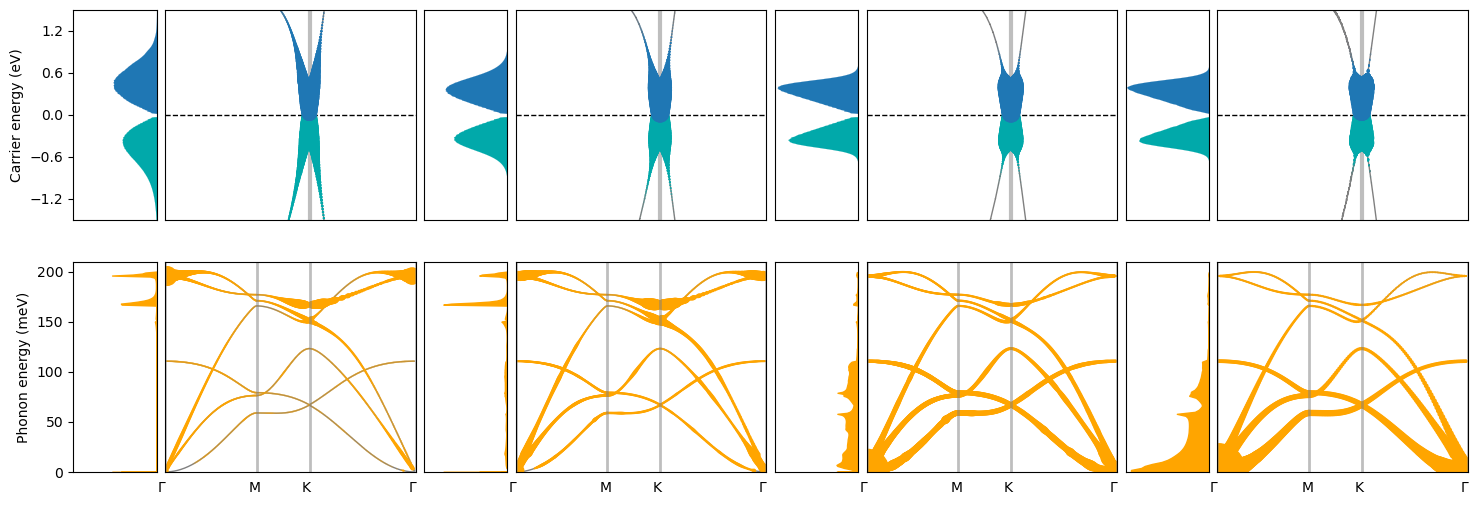

In [2]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator


def set_highsym_text(ax, pathpoint_names, pathpoint_coords):
    """
    Add texts for high symmetry path points 
    """
    distance = 0
    coord_tmp = pathpoint_coords[0, :]
    for i in np.arange(pathpoint_coords.shape[0]):
        distance += norm(coord_tmp - pathpoint_coords[i, :])
        ax.text(distance-0.05, -20.0, pathpoint_names[i])
        coord_tmp = pathpoint_coords[i, :]
        ax.axvline(x=distance, color='tab:grey', alpha=0.5, lw=2)
    ax.set_xlim([0, distance])
    return distance


# Fermi energy
popu_dir = 'population_data'
str_dir = 'structure_data'
plot_tools_dir = 'plot_tools_data'

efermi = np.loadtxt(f'{plot_tools_dir}/efermi.dat')
# location of Dirac cone
dcone = 0.910683574
# phonon frequency cut 
ph_freq_cut = 1.0 # meV


#### import data


# import selected k/q grid points close to the high symmetry paths
# kpath[0] is the x-axis to be ploted, kpath[1] is the indices in the original k-grid
kpath_400 = np.loadtxt(f'{str_dir}/kgrid_400.dat')[:,0]
kpath_200 = np.loadtxt(f'{str_dir}/kgrid_200.dat')[:,0]
qpath_400 = np.loadtxt(f'{str_dir}/qgrid_400.dat')[:,0]
qpath_200 = np.loadtxt(f'{str_dir}/qgrid_200.dat')[:,0]
pathpoint_names = [r'$\Gamma$', 'M', 'K', r'$\Gamma$']
pathpoint_coords = np.loadtxt(f'{plot_tools_dir}/path_points.dat')

# energies
band_structure_400 = np.loadtxt(f'{str_dir}/bands_400.dat')
phonon_dispersion_400 = np.loadtxt(f'{str_dir}/dispersion_400.dat')
nband = np.shape(band_structure_400)[1]
nmode = np.shape(phonon_dispersion_400)[1]
band_structure_200 = np.loadtxt(f'{str_dir}/bands_200.dat')
phonon_dispersion_200 = np.loadtxt(f'{str_dir}/dispersion_200.dat')
carrier_energy_lim = 1.5

## import populations at 0, 100fs, 1ps, 10ps and 80ps
# time vector
tvec = ["0.1", "1", "10", "80"]
# emtpy dictionaries for data stroage
carrier_pop = {}
phonon_pop = {}
electron_E = {}
hole_E = {}
phonon_E = {}

carrier_pop["0"] = np.array(np.loadtxt(f'{popu_dir}/cpop0.dat'))
carrier_pop["0.1"] = np.loadtxt(f'{popu_dir}/cpop0.1.dat')
carrier_pop["1"] = np.loadtxt(f'{popu_dir}/cpop1.dat')
carrier_pop["10"] = np.loadtxt(f'{popu_dir}/cpop10.dat')
carrier_pop["80"] = np.loadtxt(f'{popu_dir}/cpop80.dat')
# phonon population boundaries already tiled
phonon_pop["0"] = np.array(np.loadtxt(f'{popu_dir}/phpop0.dat'))
phonon_pop["0_200"] = np.array(np.loadtxt(f'{popu_dir}/phpop0_200.dat'))
phonon_pop["0.1"] = np.array(np.loadtxt(f'{popu_dir}/phpop0.1.dat'))
phonon_pop["1"] = np.loadtxt(f'{popu_dir}/phpop1.dat')
phonon_pop["10"] = np.loadtxt(f'{popu_dir}/phpop10.dat')
phonon_pop["80"] = np.loadtxt(f'{popu_dir}/phpop80.dat')

electron_E["0"] = np.loadtxt(f'{popu_dir}/eE0.dat')
electron_E["0.1"] = np.loadtxt(f'{popu_dir}/eE0.1.dat')
electron_E["1"] = np.loadtxt(f'{popu_dir}/eE1.dat')
electron_E["10"] = np.loadtxt(f'{popu_dir}/eE10.dat')
electron_E["80"] = np.loadtxt(f'{popu_dir}/eE80.dat')

hole_E["0"] = np.loadtxt(f'{popu_dir}/hE0.dat')
hole_E["0.1"] = np.loadtxt(f'{popu_dir}/hE0.1.dat')
hole_E["1"] = np.loadtxt(f'{popu_dir}/hE1.dat')
hole_E["10"] = np.loadtxt(f'{popu_dir}/hE10.dat')
hole_E["80"] = np.loadtxt(f'{popu_dir}/hE80.dat')

phonon_E["0"] = np.loadtxt(f'{popu_dir}/phE0.dat')
phonon_E["0_200"] = np.loadtxt(f'{popu_dir}/phE0_200.dat')
phonon_E["0.1"] = np.loadtxt(f'{popu_dir}/phE0.1.dat')
phonon_E["1"] = np.loadtxt(f'{popu_dir}/phE1.dat')
phonon_E["10"] = np.loadtxt(f'{popu_dir}/phE10.dat')
phonon_E["80"] = np.loadtxt(f'{popu_dir}/phE80.dat')

egrid_400 = np.loadtxt(f'{str_dir}/egrid_400.dat')
hgrid_400 = np.loadtxt(f'{str_dir}/hgrid_400.dat')
phgrid_400 = np.loadtxt(f'{str_dir}/phgrid_400.dat')
egrid_200 = np.loadtxt(f'{str_dir}/egrid_200.dat')
hgrid_200 = np.loadtxt(f'{str_dir}/hgrid_200.dat')
phgrid_200 = np.loadtxt(f'{str_dir}/phgrid_200.dat')

### plot figure
fig = plt.figure(figsize=(18,6))
num_plots = 4
num_widths = np.tile(np.array([1,3]), (num_plots,))
gs = gridspec.GridSpec(2, num_plots*2, height_ratios=[1,1], width_ratios=num_widths, wspace=0.05)
color_disp = [np.array([1,149,150])/225.0, 'tab:blue']


for i in np.arange(num_plots):
    
    ## axis setting
    axe = fig.add_subplot(gs[0, 2 * i + 1])
    axph = fig.add_subplot(gs[1, 2 * i + 1])
    axed = fig.add_subplot(gs[0, 2 * i])
    axphd = fig.add_subplot(gs[1, 2 * i])
    
    axe.xaxis.set_visible(False)
    axed.xaxis.set_visible(False)
    axe.yaxis.set_visible(False) 
    if i >= 1:
        axed.yaxis.set_visible(False)
    if i == 0:
        axphd.set_ylabel('Phonon energy (meV)')
        axed.set_ylabel('Carrier energy (eV)')
    
    axe.set_ylim([-carrier_energy_lim, carrier_energy_lim])
    axed.set_ylim([-carrier_energy_lim, carrier_energy_lim])
    axed.set_xlim([0,0.28])
    axed.yaxis.set_major_locator(MaxNLocator(nbins=5))
    axed.invert_xaxis()
       
    axph.xaxis.set_visible(False)
    axph.yaxis.set_visible(False)
    axphd.xaxis.set_visible(False)
    if i > 0:
        axphd.yaxis.set_visible(False)
    axphd.yaxis.set_major_locator(MaxNLocator(nbins=5))
    axphd.set_xlim([0,85])
    axphd.invert_xaxis()
        
    #### plot carriers     
    # plot vertical and horizontal lines at dirac cone and fermi energy
    axe.axvline(x=dcone, color='tab:grey', alpha=0.5, lw=3, zorder=0)
    axe.axhline(y=0, color='k', ls='dashed', lw=1, zorder=0)
    
    # set k-path
    if i < 3:
        kpath = kpath_400
        qpath = qpath_400
        band_structure = band_structure_400
        phonon_dispersion = phonon_dispersion_400
        egrid = egrid_400
        hgrid = hgrid_400
        phgrid = phgrid_400
        phonon_pop0 = phonon_pop["0"]
        phonon_E0 = phonon_E["0"]
    else:
        kpath = kpath_200
        qpath = qpath_200
        band_structure = band_structure_200
        phonon_dispersion = phonon_dispersion_200
        egrid = egrid_200
        hgrid = hgrid_200
        phgrid = phgrid_200
        phonon_pop0 = phonon_pop["0_200"]
        phonon_E0 = phonon_E["0_200"]
    
    # plot points on band structure
    for ibnd in range(nband):
      
        # band structure
        axe.plot(kpath, band_structure[:, ibnd] - efermi, color='grey', lw=1, zorder=0)
        # population f_nk
        carriers = carrier_pop[tvec[i]]
        axe.scatter(kpath, band_structure[:, ibnd] - efermi, 
                    s=150*np.abs(carriers[:, ibnd]), color=color_disp[ibnd])
    
    # plot f(E)
    axed.fill_between(hole_E[tvec[i]], hgrid - efermi, color=color_disp[0], lw=0.1)
    axed.fill_between(electron_E[tvec[i]], egrid - efermi, color=color_disp[1], lw=0.1)
    axed.axhline(y=0, color='w', lw=2.4)
    max_distance = set_highsym_text(axph, pathpoint_names, pathpoint_coords)
    axe.set_xlim([0, max_distance])
    axph.set_xlim([0, max_distance])
    
    #### plot phonons

    uplimit = 5 # upper limit of phonon population difference to plot
    for imode in range(nmode):
        # phonon dispersion
        axph.plot(qpath, phonon_dispersion[:, imode], color='grey', lw=1, zorder=0)
        
        # change in population N_nuq above the frequency cutoff
        pind = np.where(phonon_dispersion[:, imode] > ph_freq_cut)[0]
        diffphpops = phonon_pop[tvec[i]] - phonon_pop0
        colors = np.where(np.sign(diffphpops)==1, 'orange', 'tab:brown')
        alphas = np.where(np.sign(diffphpops)==1, 1, 0)

        diffphpops[diffphpops > uplimit] = uplimit
        
        axph.scatter(qpath[pind], phonon_dispersion[pind, imode], 
                     s=300*np.abs(diffphpops[pind, imode]), 
                     color=colors[pind, imode], alpha=alphas[pind,imode])

  
    # plot N(E)
    pindE = np.where(phgrid > ph_freq_cut)[0]
    diffpph = phonon_E[tvec[i]] - phonon_E0
    axphd.fill_between(diffpph[pindE], phgrid[pindE], color='orange')
    
    axph.set_ylim([0, np.max(phonon_dispersion)+10])
    axphd.set_ylim([0, np.max(phonon_dispersion)+10])
    
#plt.tight_layout()
   